## Advertiseing Dataset

In [1]:
import pandas as pd  # Importing pandas for data manipulation
import matplotlib.pyplot as plt  # Importing matplotlib for visualization

In [2]:
dataset = pd.read_csv("Assignment 2 Advertising.csv")  # Load dataset from CSV file
dataset = dataset.iloc[:, 1:]  # Remove the first column (assuming it's an index)
dataset.head()  # Display the first few rows of the dataset

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
x = dataset.drop('Sales', axis=1)  # Features (independent variables)
y = dataset.Sales  # Target variable (dependent variable)

In [4]:
from sklearn.model_selection import train_test_split  # Import train-test split function
# Split the dataset into training (80%) and testing (20%) sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.preprocessing import PolynomialFeatures  # Import polynomial feature transformer
poly = PolynomialFeatures(degree=3)  # Create a polynomial feature transformer of degree 3
X_train_poly = poly.fit_transform(x_train)  # Transform training data
X_test_poly = poly.fit_transform(x_test)  # Transform testing data

In [6]:
X_train_poly.shape, X_test_poly.shape

((160, 20), (40, 20))

In [7]:
import numpy as np  # Import numpy for numerical operations
y_train = np.array(y_train).reshape(-1,)  # Convert y_train to a 1D array

In [8]:
y_train.shape

(160,)

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(X_test_poly)

In [11]:
from sklearn import metrics  # Import metrics for model evaluation
# Calculate error metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)  
meanSqErr = metrics.mean_squared_error(y_test, y_pred)  
rootMeanSqErr = metrics.root_mean_squared_error(y_test, y_pred)  

# Print evaluation metrics
print('R squared: {:.2f}'.format(metrics.r2_score(y_test, y_pred)))  # R-squared score
print('Mean Absolute Error:', meanAbErr)  # Mean Absolute Error (MAE)
print('Mean Squared Error:', meanSqErr)  # Mean Squared Error (MSE)
print('Root Mean Squared Error:', rootMeanSqErr)  # Root Mean Squared Error (RMSE)


R squared: 0.99
Mean Absolute Error: 0.38868170483681946
Mean Squared Error: 0.2945684090725803
Root Mean Squared Error: 0.5427415674817807


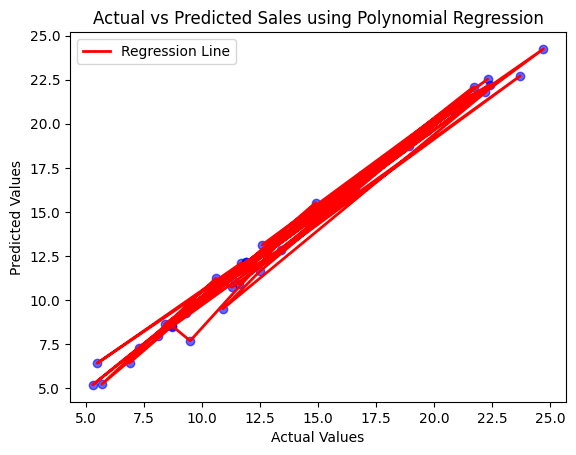

In [12]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)  # Plot actual vs predicted values
plt.plot(y_test, y_pred, color='red', linewidth=2, label='Regression Line')  # Regression line
plt.title("Actual vs Predicted Sales using Polynomial Regression")  # Plot title
plt.xlabel('Actual Values')  # X-axis label
plt.ylabel('Predicted Values')  # Y-axis label
plt.legend()  # Show legend
plt.show()  # Display the plot

In [13]:
# Sort actual and predicted values for better visualization
sorted_idx = np.argsort(y_test)  
y_test_sorted = np.array(y_test)[sorted_idx]  
y_pred_sorted = y_pred[sorted_idx]  

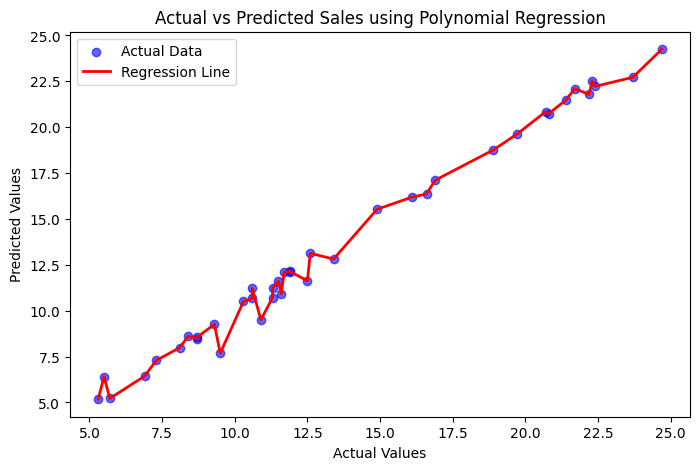

In [14]:
plt.figure(figsize=(8,5))  # Set figure size
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label="Actual Data")  # Scatter plot
plt.plot(y_test_sorted, y_pred_sorted, color='red', linewidth=2, label="Regression Line")  # Regression line
plt.title("Actual vs Predicted Sales using Polynomial Regression")  # Plot title
plt.xlabel('Actual Values')  # X-axis label
plt.ylabel('Predicted Values')  # Y-axis label
plt.legend()  # Show legend
plt.show()  # Display the plot